In [1]:
import pandas as pd
from sqlalchemy import create_engine
import datetime
import matplotlib.pyplot as plt
import numpy as np



In [2]:
# engine = create_engine("sqlite:///hashtag2020.db", echo=True)
# conn = engine.connect()

In [3]:
#Create the table. If we use automap_base, the table must have a primary key
# conn.execute("""
#     CREATE TABLE IF NOT EXISTS tweet_counts (
#         created_at PRIMARY KEY
#         tweet VARCHAR(280)
#         likes integer
#         retweet_count integer
#         source VARCHAR(30)
#         user_location VARCHAR(30)
#         lat integer
#         long integer
#     )
# """)

In [4]:
trump_csv_path = "../hashtag_donaldtrump.csv"
biden_csv_path = "../hashtag_joebiden.csv"

In [5]:
trump_data_df = pd.read_csv(trump_csv_path, lineterminator='\n')
biden_data_df = pd.read_csv(biden_csv_path, lineterminator='\n')

In [6]:
trump_data_df["hashtag"]="Trump"
biden_data_df["hashtag"]="Biden"

In [7]:
tweet_df = pd.concat([trump_data_df, biden_data_df])

In [8]:
tweet_df["created_at"]=pd.to_datetime(tweet_df.created_at)

In [9]:
tweet_df.sort_values(by = 'created_at')

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,hashtag
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,Trump
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,Biden
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,Trump
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,Trump
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591,Trump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970917,2020-11-08 23:59:54,1.325589e+18,"@sammelbis1998 @iheartmindy @bnorthg First, yo...",0.0,0.0,Twitter for iPad,7.687811e+08,Debra,drdeblk,MD. Autism specialist. Film lover. #DumpTrump2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 17:47:56.012674,Trump
970918,2020-11-08 23:59:55,1.325589e+18,OK just had to do it !\n#Trump #CatapultTrump ...,105.0,28.0,Twitter Web App,4.519791e+08,Dunken K Bliths,DunkenKBliths,"""Tesla owner's will be followed back""\n\n#Mach...",...,✔ Official Twitter Account,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 17:47:55.807500,Trump
922910,2020-11-08 23:59:56,1.325589e+18,@nbcbayarea Who doesn’t like dogs or any kind ...,1.0,1.0,Twitter for iPhone,1.182639e+08,Dianna Maria,DiannaMaria,"~ I am a very proud mom of a sweet, kind and c...",...,United States,39.783730,-100.445882,NaN,United States,North America,NaN,NaN,2020-11-09 17:46:06.939099,Trump
737089,2020-11-08 23:59:57,1.325589e+18,#JoeBiden 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂 https://t.co/Ym...,0.0,0.0,Twitter for iPhone,1.148479e+08,Nataša,PewPeeew,My brain consists of coping mechanisms and vin...,...,Deutschland,51.083420,10.423447,NaN,Germany,Europe,NaN,NaN,2020-11-09 18:26:04.550843,Biden


In [10]:
usa = {"United States of America" : "United States"}
tweet_df['country'].replace(usa, inplace=True)
tweet_df.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,hashtag
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States,North America,Florida,FL,2020-10-21 00:00:00,Trump
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,Trump
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,United States,North America,Oregon,OR,2020-10-21 00:00:00.746433060,Trump
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591,Trump
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,Washington DC,38.894992,-77.036558,Washington,United States,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,Trump


In [11]:
clean_df = tweet_df.dropna(how='any')
clean_df.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,hashtag
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,United States,North America,Oregon,OR,2020-10-21 00:00:00.746433060,Trump
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,Washington DC,38.894992,-77.036558,Washington,United States,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,Trump
11,2020-10-15 00:00:25,1.316529e+18,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,1.994033e+07,Change Illinois | Biden will increase taxes by...,changeillinois,"Illinois, home of Lincoln and Reagan, used to ...",...,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States,North America,Illinois,IL,2020-10-21 00:00:04.105381834,Trump
12,2020-10-15 00:00:26,1.316529e+18,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,1.243315e+18,Ron Burgundy,Anchorman_USA,"I'm kind of a Big Deal, People know me! I driv...",...,"San Diego, CA",32.717421,-117.162771,San Diego,United States,North America,California,CA,2020-10-21 00:00:04.478598364,Trump
13,2020-10-15 00:00:31,1.316529e+18,@Susan_Hutch @JoeBiden #Ukraine @RealDonaldTru...,2.0,0.0,Twitter Web App,3.439562e+08,Sebastian White,SebWrites,"Tortured, literary genius, well probably the f...",...,Edinburgh ~ Heart of Scotland!,55.953346,-3.188375,City of Edinburgh,United Kingdom,Europe,Scotland,SCT,2020-10-21 00:00:05.225031425,Trump


In [12]:
clean_df = clean_df.loc[clean_df['country']== 'United States']
clean_df.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,hashtag
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,United States,North America,Oregon,OR,2020-10-21 00:00:00.746433060,Trump
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,Washington DC,38.894992,-77.036558,Washington,United States,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,Trump
11,2020-10-15 00:00:25,1.316529e+18,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,1.994033e+07,Change Illinois | Biden will increase taxes by...,changeillinois,"Illinois, home of Lincoln and Reagan, used to ...",...,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States,North America,Illinois,IL,2020-10-21 00:00:04.105381834,Trump
12,2020-10-15 00:00:26,1.316529e+18,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,1.243315e+18,Ron Burgundy,Anchorman_USA,"I'm kind of a Big Deal, People know me! I driv...",...,"San Diego, CA",32.717421,-117.162771,San Diego,United States,North America,California,CA,2020-10-21 00:00:04.478598364,Trump
22,2020-10-15 00:01:14,1.316530e+18,"#Trump: Nobody likes to tell you this, but som...",1.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,United States,North America,Oregon,OR,2020-10-21 00:00:08.210763668,Trump


In [13]:
clean_df.shape

(182384, 22)

In [14]:
print("Count of duplicates: {}".format(clean_df.duplicated(subset=["tweet"]).sum()))

Count of duplicates: 21056


In [15]:
print("Original size of df: {}".format(len(clean_df)))
clean_df.drop_duplicates(subset=["tweet"], inplace=True, keep=False)
print("No duplicates size of df : {}".format(len(clean_df)))

Original size of df: 182384
No duplicates size of df : 141640


In [16]:
clean_df.reset_index(inplace=True)
clean_df.head()

,index,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,hashtag
0,2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,...,Portland,45.520247,-122.674195,Portland,United States,North America,Oregon,OR,2020-10-21 00:00:00.746433060,Trump
1,4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,...,Washington DC,38.894992,-77.036558,Washington,United States,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,Trump
2,12,2020-10-15 00:00:26,1.316529e+18,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,1.243315e+18,Ron Burgundy,Anchorman_USA,...,"San Diego, CA",32.717421,-117.162771,San Diego,United States,North America,California,CA,2020-10-21 00:00:04.478598364,Trump
3,22,2020-10-15 00:01:14,1.316530e+18,"#Trump: Nobody likes to tell you this, but som...",1.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,...,Portland,45.520247,-122.674195,Portland,United States,North America,Oregon,OR,2020-10-21 00:00:08.210763668,Trump
4,29,2020-10-15 00:01:30,1.316530e+18,@karatblood @KazePlays_JC Grab @realDonaldTrum...,2.0,0.0,Twitter for iPhone,3.602439e+07,Baylee,bayleewashere,...,"Western Washington, USA",41.882823,-87.686307,Chicago,United States,North America,Illinois,IL,2020-10-21 00:00:10.823279381,Trump


In [17]:
clean_df = clean_df[['index','created_at', 'tweet', 'likes', 'retweet_count', 'source','user_location', 'lat', 'long', 'city','state','state_code','country', 'continent','hashtag']]
clean_df.head()

,index,created_at,tweet,likes,retweet_count,source,user_location,lat,long,city,state,state_code,country,continent,hashtag
0,2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,Portland,45.520247,-122.674195,Portland,Oregon,OR,United States,North America,Trump
1,4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,Washington DC,38.894992,-77.036558,Washington,District of Columbia,DC,United States,North America,Trump
2,12,2020-10-15 00:00:26,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,"San Diego, CA",32.717421,-117.162771,San Diego,California,CA,United States,North America,Trump
3,22,2020-10-15 00:01:14,"#Trump: Nobody likes to tell you this, but som...",1.0,1.0,Twitter Web App,Portland,45.520247,-122.674195,Portland,Oregon,OR,United States,North America,Trump
4,29,2020-10-15 00:01:30,@karatblood @KazePlays_JC Grab @realDonaldTrum...,2.0,0.0,Twitter for iPhone,"Western Washington, USA",41.882823,-87.686307,Chicago,Illinois,IL,United States,North America,Trump


In [18]:
clean_df['Date'] = clean_df['created_at'].dt.strftime('%m/%d/%Y')
clean_df['Time'] = clean_df['created_at'].dt.strftime('%H:%M:%S')
clean_df.head()


,index,created_at,tweet,likes,retweet_count,source,user_location,lat,long,city,state,state_code,country,continent,hashtag,Date,Time
0,2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,Portland,45.520247,-122.674195,Portland,Oregon,OR,United States,North America,Trump,10/15/2020,00:00:02
1,4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,Washington DC,38.894992,-77.036558,Washington,District of Columbia,DC,United States,North America,Trump,10/15/2020,00:00:08
2,12,2020-10-15 00:00:26,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,"San Diego, CA",32.717421,-117.162771,San Diego,California,CA,United States,North America,Trump,10/15/2020,00:00:26
3,22,2020-10-15 00:01:14,"#Trump: Nobody likes to tell you this, but som...",1.0,1.0,Twitter Web App,Portland,45.520247,-122.674195,Portland,Oregon,OR,United States,North America,Trump,10/15/2020,00:01:14
4,29,2020-10-15 00:01:30,@karatblood @KazePlays_JC Grab @realDonaldTrum...,2.0,0.0,Twitter for iPhone,"Western Washington, USA",41.882823,-87.686307,Chicago,Illinois,IL,United States,North America,Trump,10/15/2020,00:01:30


In [19]:
# Exploratory Analysis

In [20]:
# Count for each candidate

In [21]:
countdf = clean_df["hashtag"]

In [22]:
countdf = clean_df["hashtag"].value_counts().rename_axis('hashtag').to_frame('counts').reset_index()
countdf

,hashtag,counts
0,Trump,75874
1,Biden,65766


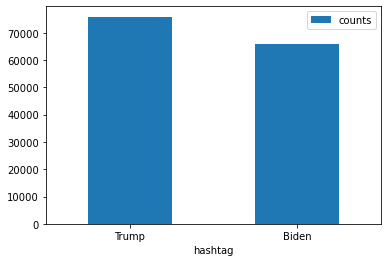

In [23]:
count = countdf.plot.bar(x = 'hashtag', y = 'counts', rot=0)

In [24]:
# tweets over timeframe

In [25]:
# count of tweets by state

In [26]:
trump_state = clean_df.loc[clean_df['hashtag']== 'Trump', :]
trump_state = trump_state.groupby(['state']).count()
state_t = pd.DataFrame(trump_state)

biden_state = clean_df.loc[clean_df['hashtag']== 'Biden', :]
biden_state = biden_state.groupby(['state']).count()
state_b = pd.DataFrame(biden_state)

state_data = pd.merge (state_t, state_b, on = 'state')
state_data = state_data.rename(columns={'tweet_x': 'Trump Tweets', 'tweet_y':'Biden Tweets'})


state_data = state_data[['Trump Tweets', 'Biden Tweets']]
state_data.head()

,Trump Tweets,Biden Tweets
state,,
Alabama,229,211
Alaska,61,95
Arizona,1315,1443
Arkansas,54,52
California,14794,12530


Text(0, 0.5, 'Number of Tweets')

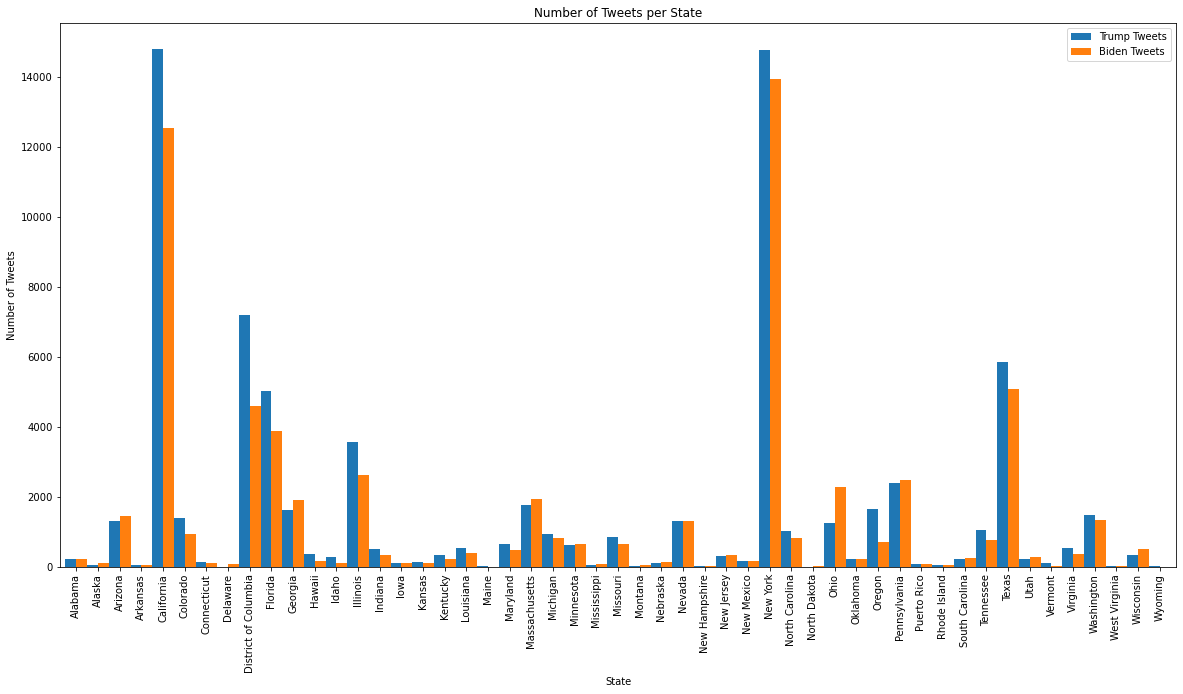

In [27]:
state_data.plot(kind='bar',title='Number of Tweets per State', figsize=(20,10), width = 1)
plt.xlabel('State')
plt.ylabel('Number of Tweets')

In [28]:
# Top 5 sources

In [29]:
trump_source = clean_df.loc[clean_df['hashtag']== 'Trump', :]
trump_source = trump_source.groupby(['source']).count().tweet.sort_values(ascending=False)[:6]
source_t = pd.DataFrame(trump_source)

biden_source = clean_df.loc[clean_df['hashtag']== 'Biden', :]
biden_source = biden_source.groupby(['source']).count().tweet.sort_values(ascending=False)[:6]
source_b = pd.DataFrame(biden_source)

source_data = pd.merge (source_t, source_b, on = 'source')
source_data = source_data.rename(columns={'tweet_x': 'Trump Tweets', 'tweet_y':'Biden Tweets'})


source_data = source_data[['Trump Tweets', 'Biden Tweets']]
source_data.head()

,Trump Tweets,Biden Tweets
source,,
Twitter for iPhone,29231,28332
Twitter Web App,24704,18348
Twitter for Android,13150,11031
Twitter for iPad,2508,3905
TweetDeck,1092,673


Text(0, 0.5, 'Number of Tweets')

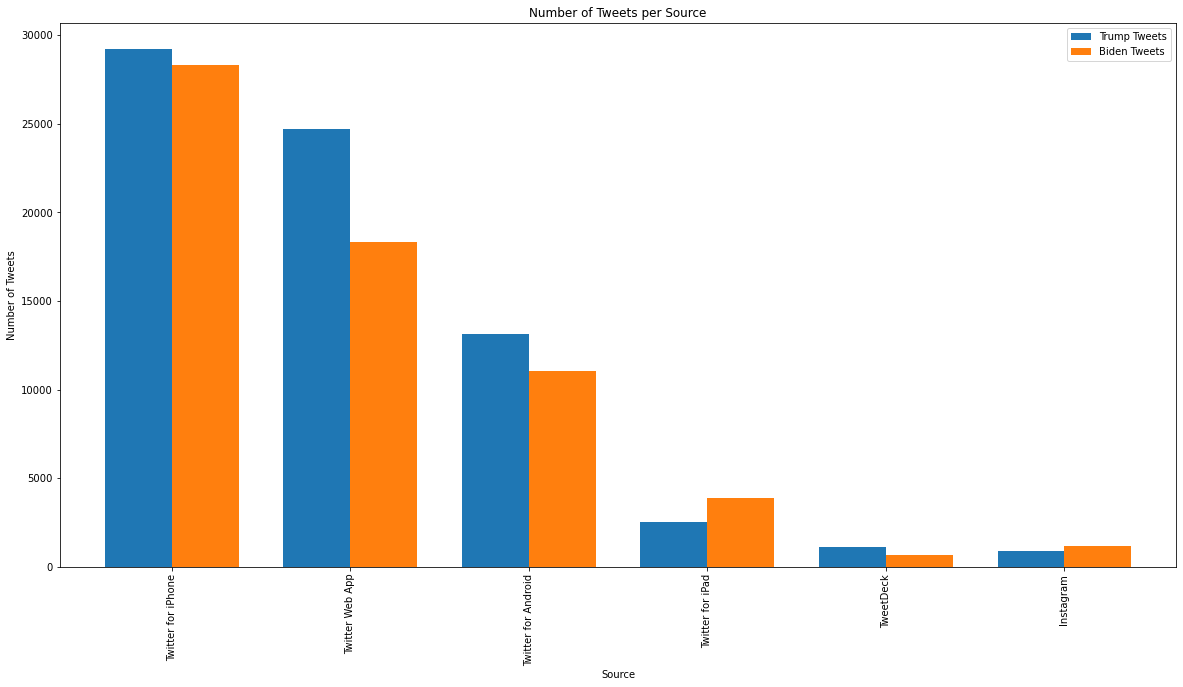

In [30]:
source_data.plot(kind='bar',title='Number of Tweets per Source', figsize=(20,10), width = 0.75)
plt.xlabel('Source')
plt.ylabel('Number of Tweets')

In [31]:
# # Insert data into DB
# df.to_sql("tweet_counts", conn, if_exists="append", index=False)